<h1>Foundational Components of Neural Networks<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Perceptron:-The-Simplest-Neural-Network" data-toc-modified-id="The-Perceptron:-The-Simplest-Neural-Network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Perceptron: The Simplest Neural Network</a></span></li><li><span><a href="#Activation-Functions" data-toc-modified-id="Activation-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activation Functions</a></span><ul class="toc-item"><li><span><a href="#Sigmoid" data-toc-modified-id="Sigmoid-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sigmoid</a></span></li><li><span><a href="#Tanh" data-toc-modified-id="Tanh-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tanh</a></span></li><li><span><a href="#ReLU-(Rectified-Linear-Unit)" data-toc-modified-id="ReLU-(Rectified-Linear-Unit)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ReLU (Rectified Linear Unit)</a></span></li><li><span><a href="#Softmax" data-toc-modified-id="Softmax-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Softmax</a></span></li></ul></li><li><span><a href="#Loss-Functions" data-toc-modified-id="Loss-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loss Functions</a></span><ul class="toc-item"><li><span><a href="#Mean-Squared-Error-Loss" data-toc-modified-id="Mean-Squared-Error-Loss-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Mean Squared Error Loss</a></span></li><li><span><a href="#Categorical-Cross-Entropy-Loss" data-toc-modified-id="Categorical-Cross-Entropy-Loss-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Categorical Cross-Entropy Loss</a></span></li><li><span><a href="#Binary-Cross-Entropy-Loss" data-toc-modified-id="Binary-Cross-Entropy-Loss-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Binary Cross-Entropy Loss</a></span></li></ul></li><li><span><a href="#Diving-Deep-into-Supervised-Training" data-toc-modified-id="Diving-Deep-into-Supervised-Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Diving Deep into Supervised Training</a></span><ul class="toc-item"><li><span><a href="#Constructing-Toy-Data" data-toc-modified-id="Constructing-Toy-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Constructing Toy Data</a></span><ul class="toc-item"><li><span><a href="#Problem-Solving-Steps" data-toc-modified-id="Problem-Solving-Steps-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Problem Solving Steps</a></span></li></ul></li><li><span><a href="#Putting-it-Together:-Gradient-Bases-Supervised-Learning" data-toc-modified-id="Putting-it-Together:-Gradient-Bases-Supervised-Learning-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Putting it Together: Gradient Bases Supervised Learning</a></span></li></ul></li><li><span><a href="#Auxiliary-Training-Concepts" data-toc-modified-id="Auxiliary-Training-Concepts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Auxiliary Training Concepts</a></span></li></ul></div>

## The Perceptron: The Simplest Neural Network

_Perceptron_ is the simplest neural network unit. It was loosely modeled after the biological neuron. It has input and output and data flow from inputs to the outputs similar to biological neuron.

<img src="../images/figure_3_1.png" />

**Each Perceptron unit has following components:**

- _Input_ ($ x $)
- _Output_ ($ y $)
- _Weights_ ($ w $)
- _Bias_ ($ b $)
- _Activation Function_ ($ f $)

Weights & bias are learned from the data & activation function is handpicked depending on network and target outputs.

Mathematically this can expressed as following:

$$ y = f(wx + b) $$

Activation function is typically a non linear function and $ wx + b $ is a linear function hence a Perceptron is a _composition of a linear and nonlinear function_. The linear expression $ wx + b $ is also known as an _affine transform_.

In [2]:
# Implementing a perceptron using PyTorch

import torch
import torch.nn as nn


class Perceptron(nn.Module):
    """
    A Perceptron is one Linear Layer.
    """
    def __init__(self, input_dim):
        """
        Args:
            input_dim(int): Size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)
    
    def forward(self, x_in):
        """
        The forward pass of the Perceptron.
        
        Args:
            x_in(torch.Tensor): an input data tensor x_in.shape
            should be (batch, num_features).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

## Activation Functions

Activation functions are nonlinearities introduced in a neural network to capture complex relationships in data.

### Sigmoid

Sigmoid takes any real value and squashes it into the range $ [0, 1] $. 

Mathematically sigmoid function is expressed as follows:

$$ f(x) = \frac {1}{1 + e^{-x}} $$

Sigmoid function saturates very quickly and for a majority of the inputs. This can lead to _vanishing gradient problem(gradient becoming 0)_ and _exploring gradient problem(overflowing floating point value)_. 

Due to this sigmoid is rarely used in network units rather it is used at output where output are required to be interpreted as probabilities.


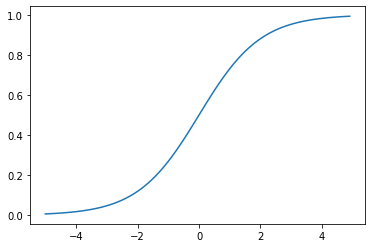

In [5]:
# Sigmoid activation example

import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### Tanh

The tanh activation function is a cosmetically different variant of the sigmoid and it is simply a linear transform of the sigmoid function. 

Tanh is also a squashing function as it maps real values form $ [-\infty, +\infty] $ to the range $ [-1, +1] $.

Mathematically, tanh can be expressed as following:

$$ f(x) = \tanh x = \frac {e^x - e^{-x}}{e^x + e^{-x}}$$

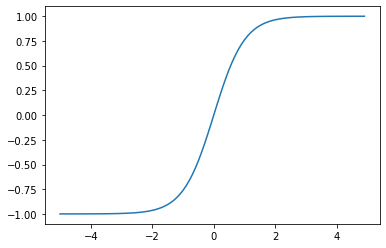

In [8]:
# Tanh activation example

import torch
import matplotlib.pyplot as plt

x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

### ReLU (Rectified Linear Unit)

ReLU unit clips the negative values to zero and it can be expressed as following:

$$ f(x) = max(0, x) $$

ReLU can be impacted by _dying ReLU problem_ as some certrain outputs in the network can simply become zero and never revive again.

To mitigate this effect, variants such as _Leaky ReLU and Parameteric ReLU(PReLU)_ activation functions have been proposed where the lead coefficient $ a $ is a learned paremeter. It can expressed as:

$$ f(x) = max(x, ax) $$

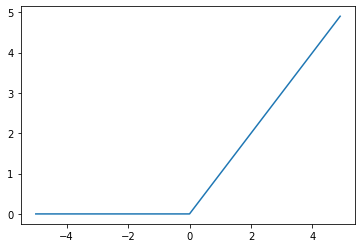

In [11]:
# ReLU activation example

import torch
import matplotlib.pyplot as plt

relu = torch.nn.ReLU()
x = torch.arange(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

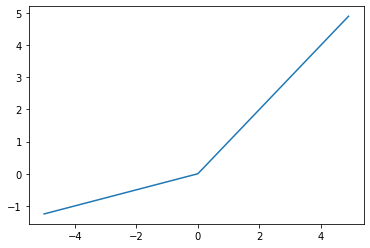

In [18]:
# PReLU activation example

import torch
import matplotlib.pyplot as plt

prelu = torch.nn.PReLU(num_parameters=1)
x = torch.arange(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

### Softmax

Softmax function also squashes the output betweem $ [0, 1] $ range. It also divides each output by the sum of all the outputs, whcih gives us a discrete probability distribution over k possible classes.

This can be expressed as:

$$ softmax(x_i) = \frac {e^{x_i}} { \sum_{j=1}^h e^{x_j}} $$

In [21]:
# Softmax activation Example

import torch

softmax = torch.nn.Softmax(dim=1)
x = torch.randn(1, 3)
y = softmax(x)
print(x)
print(y)
print(torch.sum(y, dim=1))

tensor([[-0.3034,  0.5813, -0.0656]])
tensor([[0.2132, 0.5164, 0.2704]])
tensor([1.])


## Loss Functions

Loss functions help guide the training algorithm to pick the right parameters by using the data. Loss function takes a truth($ y $) and a prediction( $ \hat y $) as an input and produced a real values score. The lower the score, better the model prediction is.

### Mean Squared Error Loss

The MSE is simply the average of the squares of the difference between the predicted & target values.

It can expressed as followings:

$$ L_{mse} (y, \hat y) = \frac {1}{n} \sum_{i=1}^n (y - \hat y)^2$$

In [22]:
# MSE Loss

import torch
import torch.nn as nn

mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(1.3157, grad_fn=<MseLossBackward>)


### Categorical Cross-Entropy Loss

The catehorical cross-entropy is used in a multiclass classification setting in which the outputs are interpreted as predictions of class membership probabilities.

This can be expressed as followings:

$$ L_{cross\_entropy}(y, \hat y) = - \sum_i y_i \log(\hat y_i) $$

To correctly use this function, it important to udnerstand following points WRT relationship between network outputs and how loss function is computed:

- There is a limit to how small or how large a number can be.
- If input to the exponential function used in the softmax formula is a negative number, the result is an exponentially small number and it its a positive number, the resultant is an exponentially large number.
- Network output is assumed to be vector prior to applying the softmax function.
- The _log_ function is the inverse of the exponential function and $ log(exp(x)) $ is just equal to $ x $.

In [24]:
# Crosss-entropy loss example

ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.0911, grad_fn=<NllLossBackward>)


### Binary Cross-Entropy Loss

When we need to discriminate between two classes, it is known as _binary classification_. For such problems, it is efficient to use the Binary Cross-Entropy(BCE) loss.

In [26]:
# Binary Cross-Entropy Loss

bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)

tensor([[0.8030],
        [0.8565],
        [0.4507],
        [0.7576]], grad_fn=<SigmoidBackward>)
tensor(1.0937, grad_fn=<BinaryCrossEntropyBackward>)


## Diving Deep into Supervised Training

_Supervised Learning_ is the problem of learning how to map _observations_ to specified _targets_ given labeled examples.

Supervised Learning requires the followings:

- _A Model_ -> Computes predictions from the observations
- _A Loss Function_ -> Measures the error of predictions as compared to the targets
- _Training Data_ -> Pair of Observations & Targets
- _An Optimisation Algorithm_ -> Used to adjust the model parameters to keep losses as low as possible

### Constructing Toy Data

In [30]:
import numpy as np

LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)

def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

In [31]:
def visualize_results(perceptron, x_data, y_truth, n_samples=1000, ax=None, epoch=None, 
                      title='', levels=[0.3, 0.4, 0.5], linestyles=['--', '-', '--']):
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32)

    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32)

    n_classes = 2

    all_x = [[] for _ in range(n_classes)]
    all_colors = [[] for _ in range(n_classes)]
    
    colors = ['black', 'white']
    markers = ['o', '*']
    
    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth):
        all_x[y_true_i].append(x_i)
        if y_pred_i == y_true_i:
            all_colors[y_true_i].append("white")
        else:
            all_colors[y_true_i].append("black")
        #all_colors[y_true_i].append(colors[y_pred_i])

    all_x = [np.stack(x_list) for x_list in all_x]

    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10,10))
        
    for x_list, color_list, marker in zip(all_x, all_colors, markers):
        ax.scatter(x_list[:, 0], x_list[:, 1], edgecolor="black", marker=marker, facecolor=color_list, s=300)
    
        
    xlim = (min([x_list[:,0].min() for x_list in all_x]), 
            max([x_list[:,0].max() for x_list in all_x]))
            
    ylim = (min([x_list[:,1].min() for x_list in all_x]), 
            max([x_list[:,1].max() for x_list in all_x]))
            
    # hyperplane
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=levels, linestyles=linestyles)    
    
    plt.suptitle(title)
    
    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

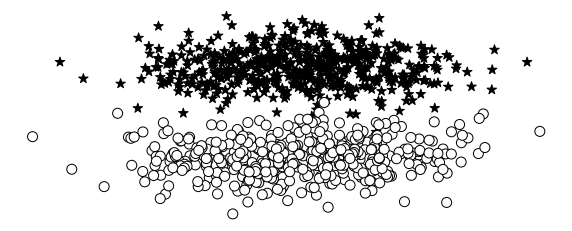

In [32]:
# Initial Data Plot

seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

x_data, y_truth = get_toy_data(batch_size=1000)

x_data = x_data.data.numpy()
y_truth = y_truth.data.numpy()

left_x = []
right_x = []
left_colors = []
right_colors =  []

for x_i, y_true_i in zip(x_data, y_truth):
    color = 'black'

    if y_true_i == 0:
        left_x.append(x_i)
        left_colors.append(color)

    else:
        right_x.append(x_i)
        right_colors.append(color)

left_x = np.stack(left_x)
right_x = np.stack(right_x)

_, ax = plt.subplots(1, 1, figsize=(10,4))

ax.scatter(left_x[:, 0], left_x[:, 1], color=left_colors, marker='*', s=100)
ax.scatter(right_x[:, 0], right_x[:, 1], facecolor='white', edgecolor=right_colors, marker='o', s=100)

plt.axis('off');

#### Problem Solving Steps

- Choosing a Model
- Converting the probabilities to discrete classes
- Chossing a loss function
- Choosing an Optimizer

In [33]:
# Instantiating the Adam optimizer

import torch.optim as optim

input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)

### Putting it Together: Gradient Bases Supervised Learning

_Gradient-Stepping_ Algorithm steps:

- First bookkeeping information such as gradients, stored inside the model object are cleared with a function named `zero_grad()`.
- Then model computes outputs(`y_pred`) given the input data(`x_data`).
- Loss is computed by comparing model outputs(`y_pred`) to intended targets(`y_target`).
- PyTorch loss object(`criterion`) uses `backward()` function to propagate the loss backward through the computational graph and notifies each parameter of its gradient.
- Finally, optimizer(`opt`) instructs the parameters how to update their values knowing the gradient with function named `step()`.

In [34]:
# A Supervised training loop for a perceptron and binary classification


def train_model(model, n_epochs, n_batches, data_fn, loss_fn, optimizer):
    # Each epoch is a complete pass over the training data
    for epoch_i in range(n_epochs):
        # The inner loop is over the batches in the dataset
        for batch_i in range(n_batches):
            # Step 0: Get the data
            x_data, y_target = data_fn(batch_size)
            
            # Step 1: Clear the gradients
            model.zero_grad()
            
            # Step 2: Compute the forward pass of the model
            y_prad = model(x_data, apply_sigmoid=True)
            
            # Step 3: Compute the loss value that we wish to optimizer
            loss = loss_fn(y_pred, y_target)
            
            # Step 4: Prepagate the loss signal backward
            loss.backward()
            
            # Step 5: Trigger the optimizer to perform one update
            optimizer.step()

## Auxiliary Training Concepts

**Correctly Measuring Model Performance: Evaluation Metrics**

- Models are evaludated using one or more _evaluation metrics_.
- Accuracy is simply the fraction of the predictions that were correct on a dataset unseen during trainig.

**Correcrly Measuing Model Performace: Splitting the Dataset**

- Final goal of modeling is to generalize well to true distribution of data.
- Model is said to have generalized better than another model if it reduces error on sample seen in the training data and also samples from the unseen data.
- To accomplish this goal, it is a good practice to aggregate the dataset by class label and then randomly split each set separated by class label into training, validation & test datasets. A common split percentage is to reserve 70% for training, 15% for validation & 15% for testing.

**Knowing When to stop train**

- Most common methods is to use heuristic called _early stopping_.
- It keep track of the performance on the validation dataset for each epoch and terminates of performance no longer improves.
- Number of epochs to wait before terminating the training referred to as the _patience_. The point at which model stops improving is said to be when the model has _converged_.

**Finding the right Hyperparameters**

- A _hyperparameter_ is any model setting that affetcs the number of parameters in the model and values by the parameters.
- Some examples are loss function, optimzer, learning rate of optimizer, layer sizes, patience for early stopping and regularization decisions.

**Regularization**

- _L2 regularization_ is called smoothness constraint whereas _L1 regularization_ is used to encourage sparser solutions where most of the model parameters values are close to zero.